**Data Analysis and Visualization**

In this section, the results obtained in "model_run" will be analyzed and visualized.

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Upload Necessary Data**

In [ ]:
# upload the data with the following code
model_dataframe = pd.read_csv(f"../result_experiment/{'model_experiment'}.csv")


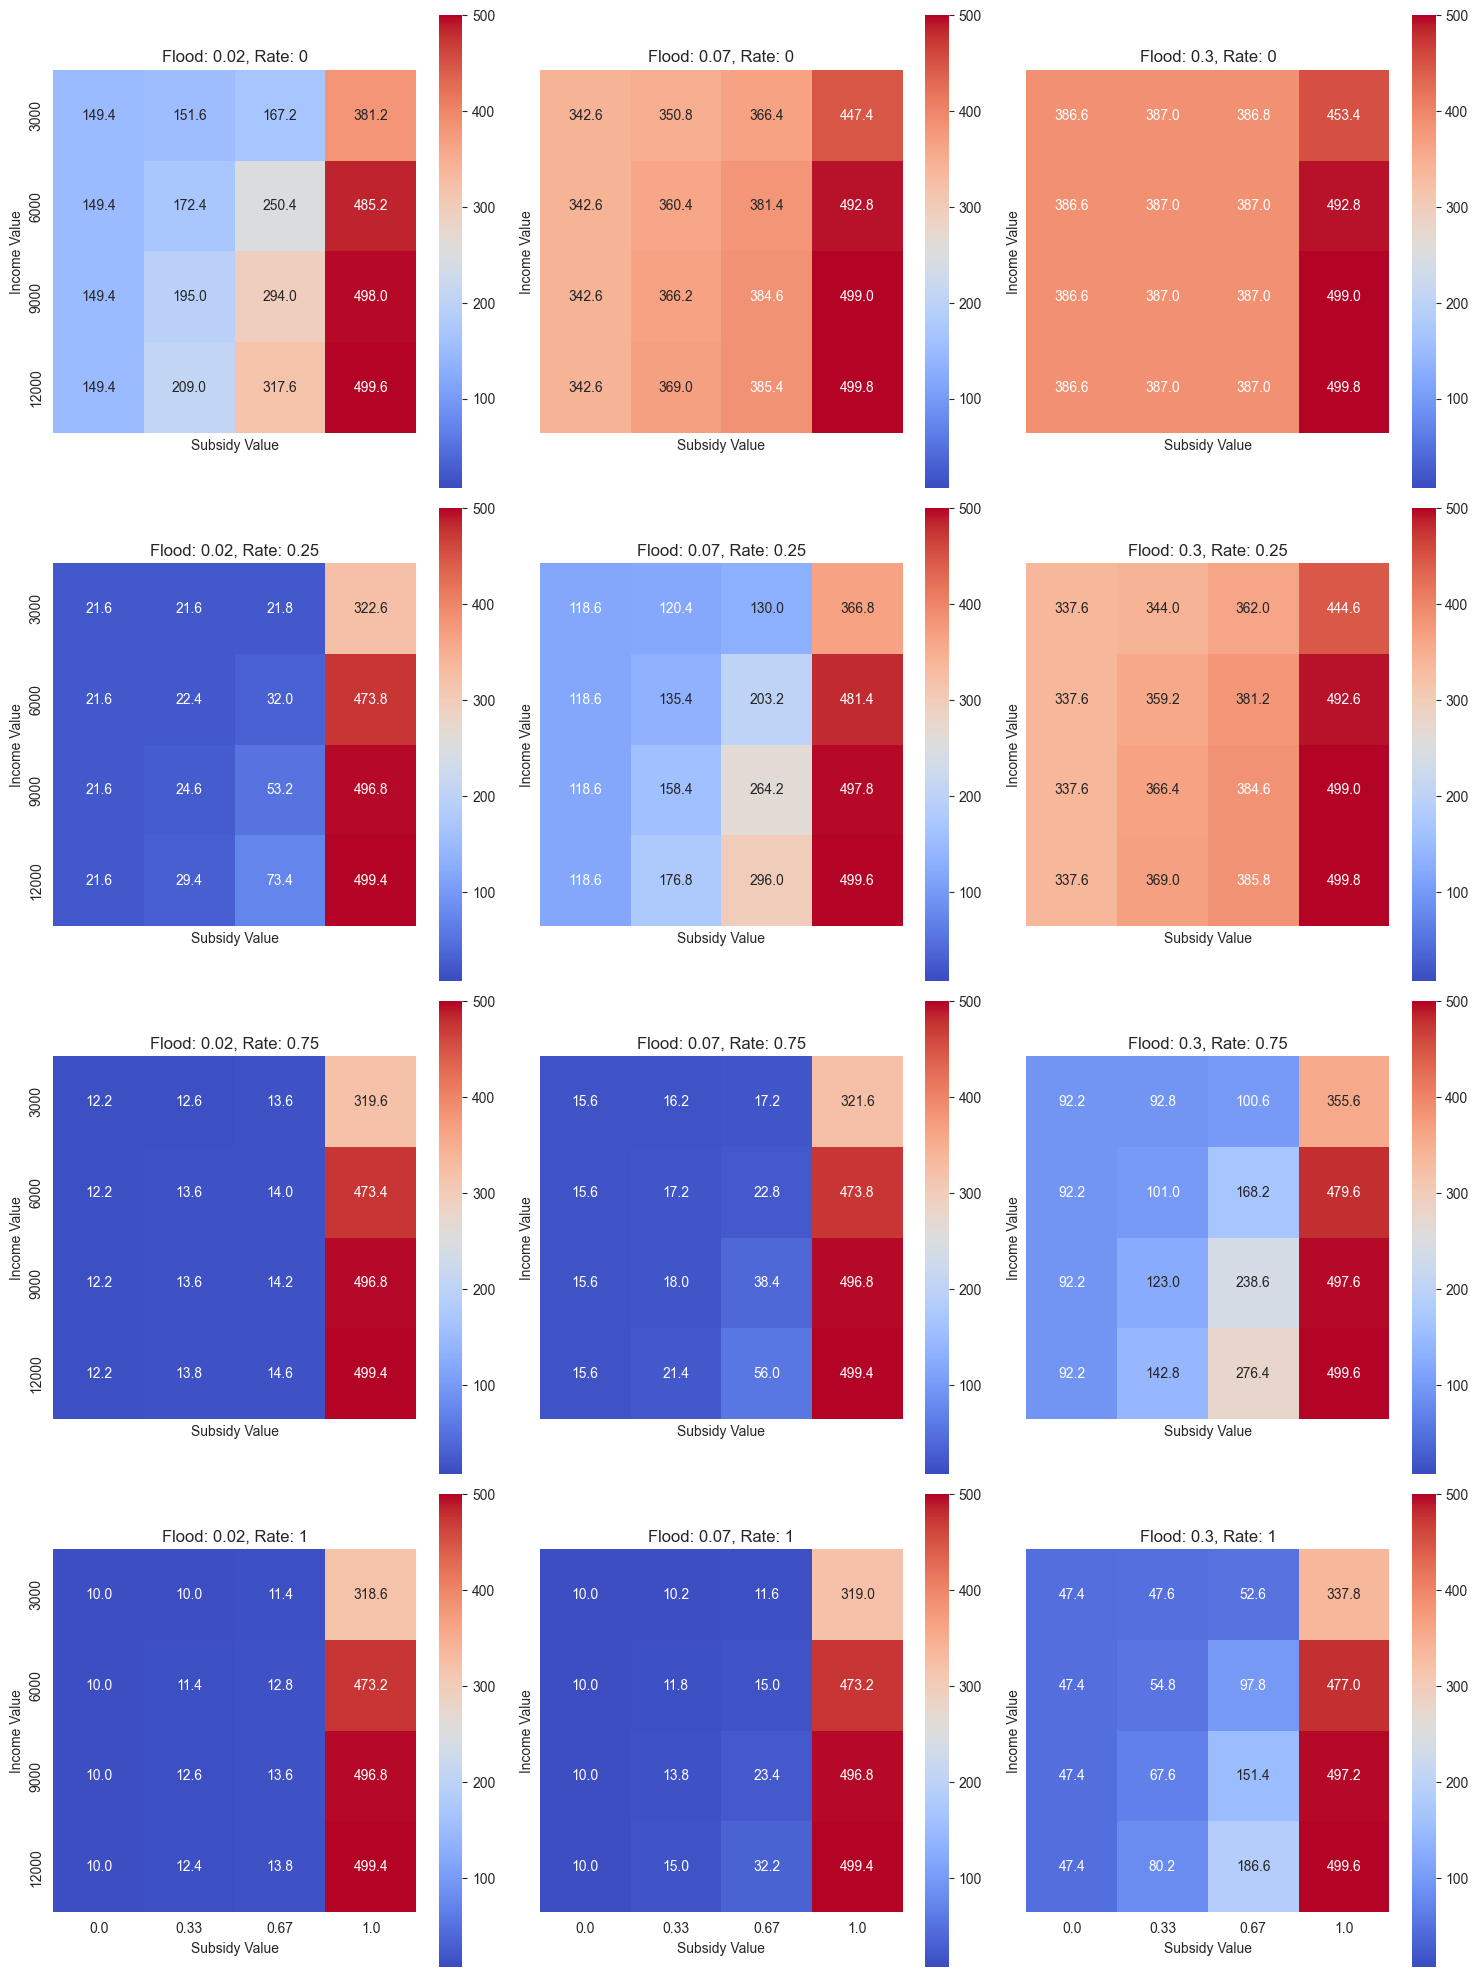

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Load your DataFrame here with the actual data
model_dataframe = pd.read_csv("../result_experiment/model_experiment.csv")

# Filtering for Step 399
model_dataframe = model_dataframe[model_dataframe['Step'] == 399]

# Define the values to be used in the heatmap
subsidy_values = [0, 0.33, 0.67, 1]
income_values = [3000, 6000, 9000, 12000]
rates = [0, 0.25, 0.75, 1]
flood_values = [0.02, 0.07, 0.3]

# Create a DataFrame with all possible combinations of subsidy and income values
all_combinations = pd.DataFrame(list(itertools.product(income_values, subsidy_values)), columns=['income_value', 'subsidy_value'])

# Initialize the figure for the subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20), sharex='col', sharey='row')

# Calculate global min and max for the color scale
global_min = model_dataframe['total_adapted_households'].min()
global_max = model_dataframe['total_adapted_households'].max()

# Iterate over the combinations of rate and flood_value to create the heatmaps
for i, rate in enumerate(rates):
    for j, flood_value in enumerate(flood_values):
        # Filter and group the data
        df_filtered = model_dataframe[(model_dataframe['rate'] == rate) & (model_dataframe['flood_value'] == flood_value)]
        df_grouped = df_filtered.groupby(['income_value', 'subsidy_value', 'replication/seed']).agg({'total_adapted_households': 'mean'}).reset_index()

        # Aggregate across all replication/seed instances
        df_aggregated = df_grouped.groupby(['income_value', 'subsidy_value']).agg({'total_adapted_households': 'mean'}).reset_index()

        # Merge with all combinations to ensure all cells are present
        heatmap_data = pd.merge(all_combinations, df_aggregated, on=['income_value', 'subsidy_value'], how='left')
        heatmap_data['total_adapted_households'].fillna(0, inplace=True)

        # Pivot the data for the heatmap
        data_pivot = heatmap_data.pivot(index='income_value', columns='subsidy_value', values='total_adapted_households')

        # Plot the heatmap with global color scale
        sns.heatmap(data_pivot, ax=axes[i, j], cmap='coolwarm', annot=True, fmt=".1f", square=True, vmin=global_min, vmax=global_max)
        axes[i, j].set_title(f'Flood: {flood_value}, Rate: {rate}')
        axes[i, j].set_xlabel('Subsidy Value')
        axes[i, j].set_ylabel('Income Value')

# Adjust layout and display
plt.tight_layout()
plt.show()

